In [2]:
import numpy as np 
np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2 + np.poly1d([5, -6])**2

poly1d([ 38, -94,  62])

In [3]:
import sympy as sym

th = sym.Symbol('th')
diff_th = sym.diff(38*th**2 - 95*th + 62, th)
diff_th

76*th - 95

In [4]:
from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_pd = read_csv('../data/housing.csv', header = None, delimiter = r"\s+", names = column_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
import plotly.express as px
fig = px.histogram(boston_pd, x='PRICE')
fig.show()

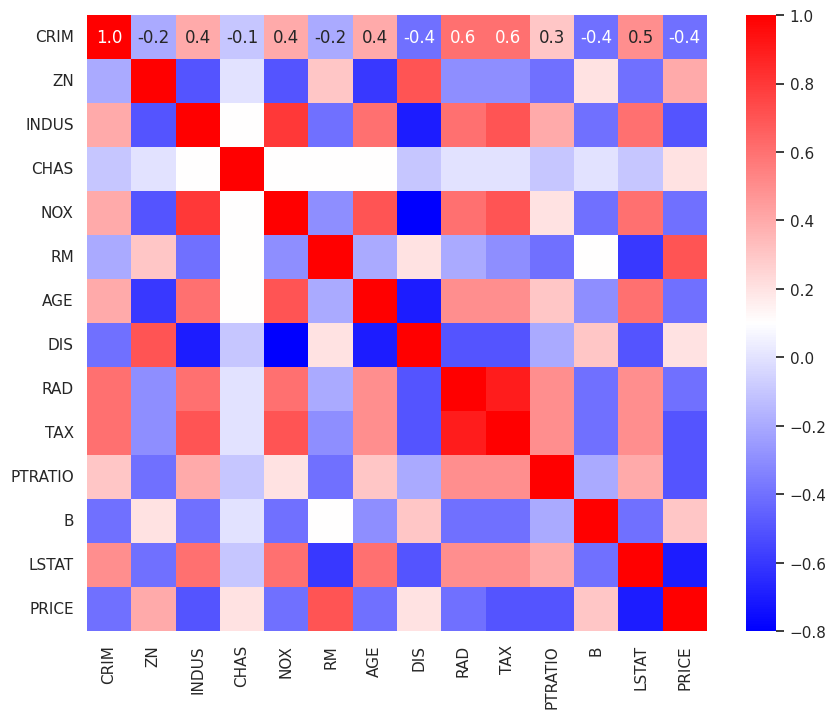

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc = {'figure.figsize':(10, 8)})
# sns.heatmap(data = corr_mat, annot = True, cmap = 'bwr');
sns.heatmap(data=corr_mat, annot=True, fmt='.1f', cmap='bwr');


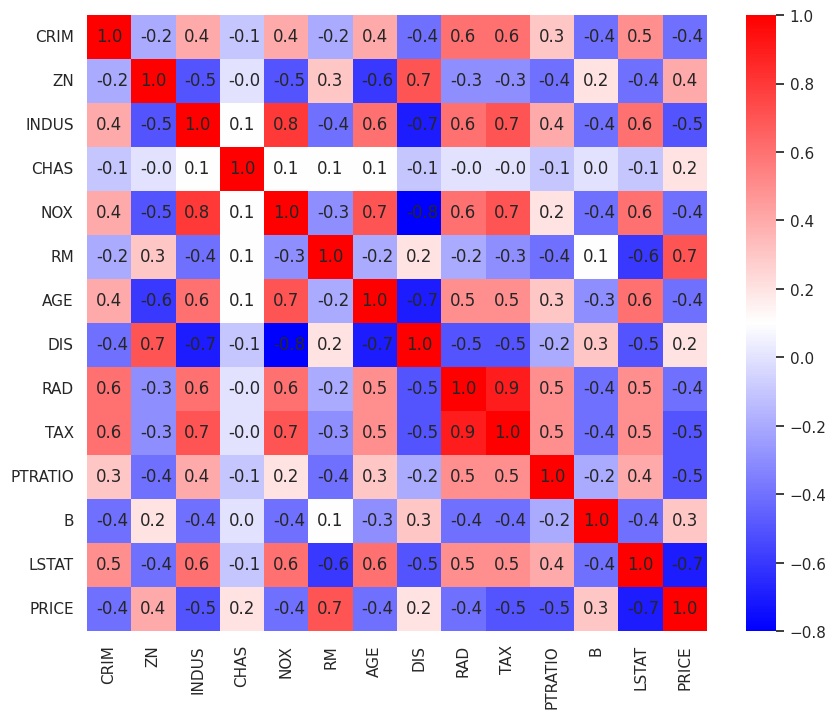

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=corr_mat, cmap='bwr', ax=ax);
for i, idx in enumerate(corr_mat.index):
    for j, col in enumerate(corr_mat.columns):
        plt.text(i+0.2, j+0.6, corr_mat.loc[idx, col])

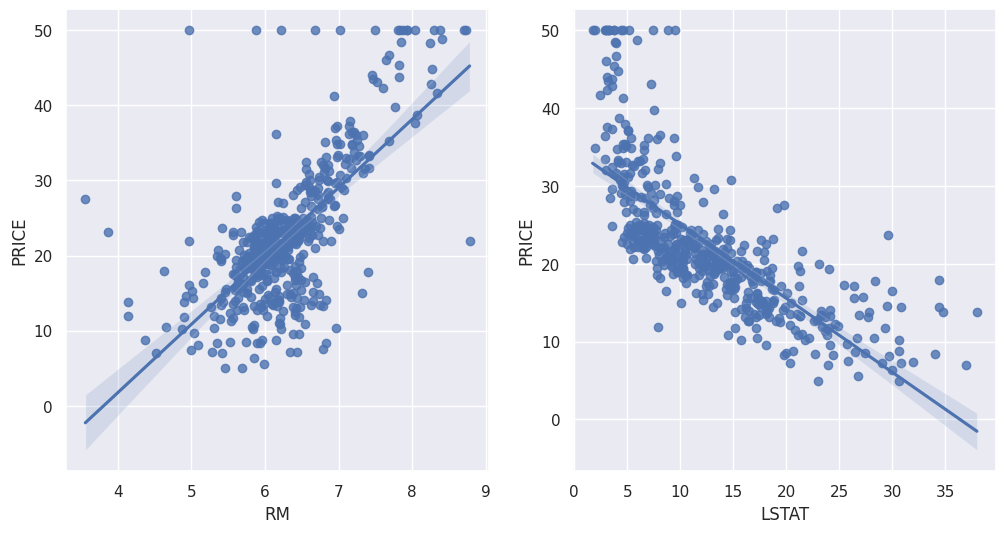

In [10]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12, 6)})
fig, ax = plt.subplots(ncols = 2)
sns.regplot(x = 'RM', y = 'PRICE', data = boston_pd, ax = ax[0])
sns.regplot(x = 'LSTAT', y = 'PRICE', data = boston_pd, ax = ax[1]);

In [11]:
from sklearn.model_selection import train_test_split
X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
#LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

LinearRegression()

In [13]:
import numpy as np 
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))
print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  4.642806069019823
RMSE of Test Data:  4.931352584146701


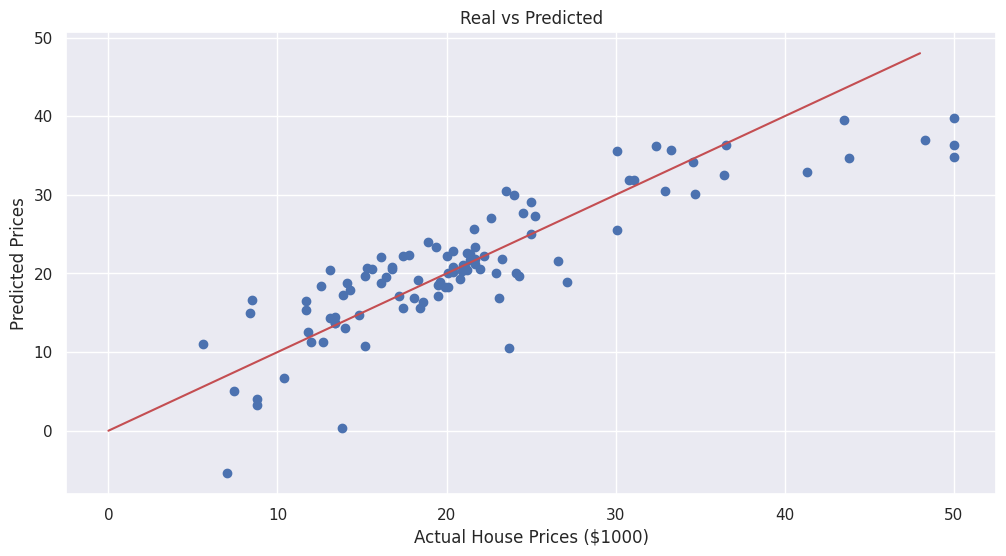

In [14]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0, 48], [0, 48], 'r')
plt.show()

In [15]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))
print('RMSE of Train Data: ', rmse_tr)
print('RMSE of Test Data: ', rmse_test)

RMSE of Train Data:  5.165137874244864
RMSE of Test Data:  5.295595032597169


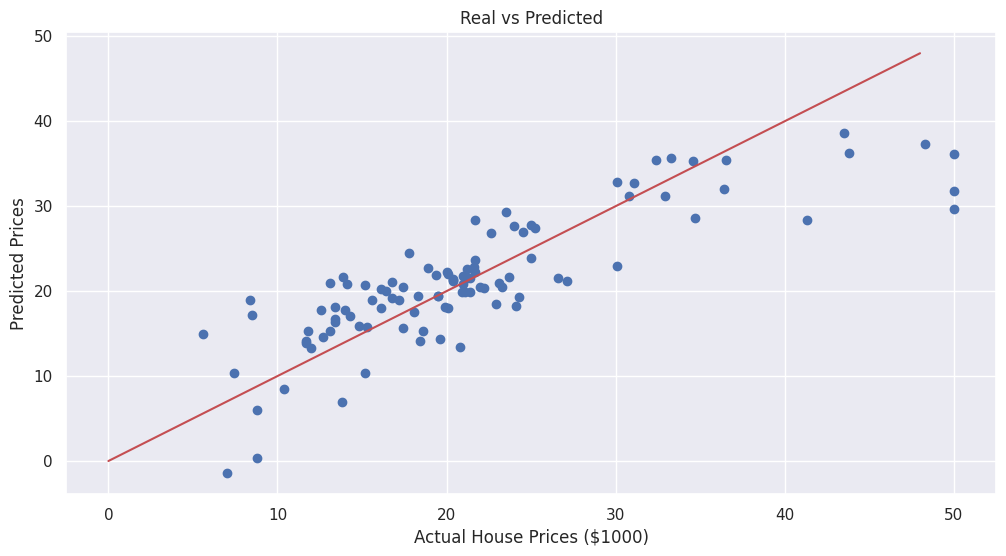

In [17]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0, 48], [0, 48], 'r')
plt.show()